### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.preprocessing import StandardScaler
from featurewiz import featurewiz
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



### Loading in the Dataset

In [2]:
df = pd.read_csv('transactions_data.csv')
df.shape

(2928154, 21)

In [3]:
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,0,2022-01-01 00:00:17,6160,6202,31.83,0,1,1,1.0,...,1.0,31.83,1.0,31.83,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2022-01-01 00:00:31,596,6532,57.16,0,1,1,1.0,...,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2022-01-01 00:01:05,9339,10651,28.92,0,1,1,1.0,...,1.0,28.92,1.0,28.92,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,2022-01-01 00:02:10,4961,8673,81.51,0,1,1,1.0,...,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,2022-01-01 00:02:21,6170,4884,25.17,0,1,1,1.0,...,1.0,25.17,1.0,25.17,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.drop(['Unnamed: 0', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID'], axis = 1, inplace = True)
df.head()

,TRANSACTION_ID,TX_AMOUNT,TX_FRAUD,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,31.83,0,1,1,1.0,31.83,1.0,31.83,1.0,31.83,0.0,0.0,0.0,0.0,0.0,0.0
1,1,57.16,0,1,1,1.0,57.16,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
2,2,28.92,0,1,1,1.0,28.92,1.0,28.92,1.0,28.92,0.0,0.0,0.0,0.0,0.0,0.0
3,3,81.51,0,1,1,1.0,81.51,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
4,4,25.17,0,1,1,1.0,25.17,1.0,25.17,1.0,25.17,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.columns

Index(['TRANSACTION_ID', 'TX_AMOUNT', 'TX_FRAUD', 'TX_DURING_WEEKEND',
       'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW'],
      dtype='object')

In [6]:
df['TX_FRAUD'].value_counts()

0    2915051
1      13103
Name: TX_FRAUD, dtype: int64

### Dealing with Data Imbalance

In [7]:
df['TX_FRAUD'].value_counts()

0    2915051
1      13103
Name: TX_FRAUD, dtype: int64

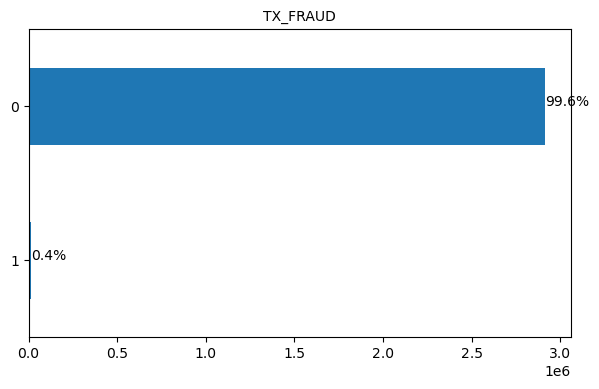

In [8]:
ax = df["TX_FRAUD"].value_counts().sort_values().plot(kind = 'barh', figsize=(7,4))
plt.title("TX_FRAUD", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

### Oversampling

In [9]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy=0.5, random_state=0)

In [10]:
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('TX_FRAUD', axis=1), df['TX_FRAUD'])

df_over = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

### Undersampling

In [11]:
sm = RandomUnderSampler(sampling_strategy=1.0,random_state=0)

In [12]:
# Fit the model to generate the data.
undersampled_X, undersampled_Y = sm.fit_resample(df_over.drop('TX_FRAUD', axis=1), df_over['TX_FRAUD'])

df_under = pd.concat([pd.DataFrame(undersampled_Y), pd.DataFrame(undersampled_X)], axis=1)

In [13]:
df_under['TX_FRAUD'].value_counts()

0    1457525
1    1457525
Name: TX_FRAUD, dtype: int64

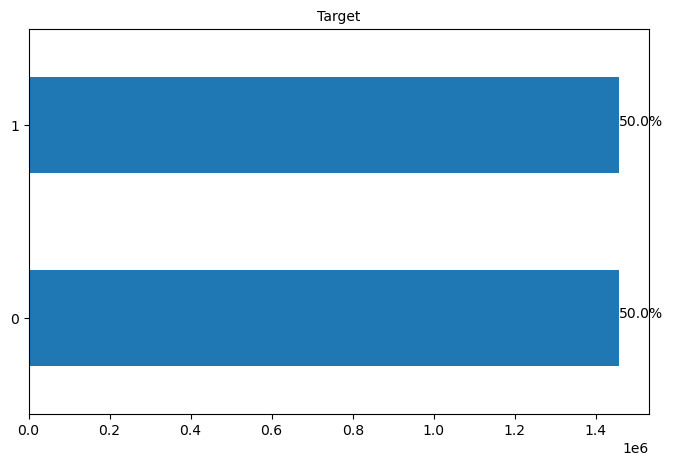

In [14]:
ax = df_under["TX_FRAUD"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("Target", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df_under.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [15]:
df_under.shape

(2915050, 17)

In [16]:
df_under.head(10)

,TX_FRAUD,TRANSACTION_ID,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,12687,59.00,1,0,2.0,48.035000,2.0,48.035000,2.0,48.035000,0.0,0.0,0.0,0.0,0.0,0.00
1,0,1562171,27.51,0,0,3.0,21.486667,28.0,27.206429,110.0,26.447091,0.0,0.0,5.0,0.0,30.0,0.00
2,0,2718178,21.46,1,1,1.0,21.460000,11.0,25.707273,47.0,33.448511,1.0,0.0,5.0,0.0,33.0,0.00
3,0,2853776,70.21,1,1,2.0,95.570000,17.0,90.821176,85.0,92.708000,2.0,0.0,13.0,0.0,35.0,0.00
4,0,1881375,135.84,0,0,3.0,107.303333,19.0,90.104211,70.0,92.531000,1.0,0.0,6.0,0.0,32.0,0.00
5,0,1586982,48.75,0,0,2.0,45.430000,6.0,52.931667,27.0,61.332222,1.0,0.0,5.0,0.0,29.0,0.00
6,0,1458756,30.16,0,1,4.0,60.500000,23.0,68.208696,94.0,62.980213,0.0,0.0,4.0,0.0,20.0,0.05
7,0,1169431,63.07,0,0,4.0,64.627500,19.0,73.994737,83.0,80.362771,1.0,0.0,6.0,0.0,26.0,0.00
8,0,1131854,41.26,0,0,2.0,58.530000,15.0,86.106667,54.0,72.983333,0.0,0.0,4.0,0.0,33.0,0.00
9,0,2831280,20.67,0,0,4.0,23.032500,16.0,24.565625,58.0,24.395172,2.0,0.0,12.0,0.0,31.0,0.00


### Splitting The Dataset

In [17]:
X = df_under.drop(['TX_FRAUD',"TRANSACTION_ID"], axis =1)
y = df_under['TX_FRAUD']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=12, stratify= y)

In [19]:
X_train.shape

(2186287, 15)

In [20]:
X_test.shape

(728763, 15)

### 1. Random Forest Model

In [21]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [22]:
## Instantiating the model

rf = RandomForestClassifier(n_estimators = 10,max_depth= 10 )

## Training the model with the the train dataset
model_rf = %time rf.fit(X_train, y_train)

Wall time: 2min 16s


In [23]:
## Predicitng the the target variables of the test data 
Y_pred_rf = rf.predict(X_test)

In [24]:
# Calculating and viewing the accuracy score for the decision tree model

print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_rf)*100))

Random Forest Model accuracy score: 95.4472


In [25]:
# Calculating and viewing the precision score for the decision tree model

precision_rf = precision_score(y_test, Y_pred_rf, pos_label=1)
print('Random Forest Model Precision score: {0:0.4f}'.format(precision_rf*100))

Random Forest Model Precision score: 98.5460


In [26]:
# Calculating and viewing the recall score for the decision tree model

recall_rf = recall_score(y_test, Y_pred_rf, pos_label=1)
print('Random Forest Model Recall score: {0:0.4f}'.format(recall_rf*100))

Random Forest Model Recall score: 92.2557


In [27]:
# Calculating and viewing the precision score for the decision tree model

f1_score_rf = f1_score(y_test, Y_pred_rf, pos_label=1)
print('Random Forest Model F1_score: {0:0.4f}'.format(f1_score_rf*100))

Random Forest Model F1_score: 95.2971


In [28]:
top_k_rf = top_k_accuracy_score(y_test, Y_pred_rf)
print('Random Forest Model Top k Accuracy_score: {0:0.4f}'.format(top_k_rf*100))

Random Forest Model Top k Accuracy_score: 100.0000


In [29]:
ave_pre_rf = average_precision_score(y_test, Y_pred_rf)
print('Random Forest Model Average Precision Score: {0:0.4f}'.format(ave_pre_rf*100))

Random Forest Model Average Precision Score: 94.7864


In [30]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, Y_pred_rf)
print('Confusion matrix\n\n', cm_rf)
print('\nTrue Positives(TP) = ', cm_rf[1,1])
print('\nTrue Negatives(TN) = ', cm_rf[0,0])
print('\nFalse Positives(FP) = ', cm_rf[0,1])
print('\nFalse Negatives(FN) = ', cm_rf[1,0])

Confusion matrix

 [[359421   4960]
 [ 28219 336163]]

True Positives(TP) =  336163

True Negatives(TN) =  359421

False Positives(FP) =  4960

False Negatives(FN) =  28219


<AxesSubplot:>

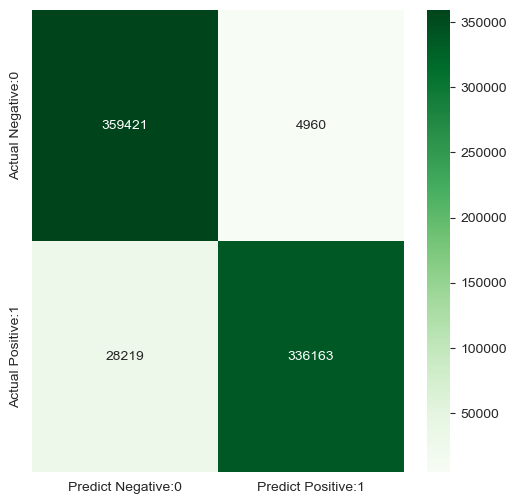

In [31]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_rf_matrix = pd.DataFrame(data=cm_rf, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_rf_matrix, annot=True, fmt='d', cmap=plt.cm.Greens)

In [32]:
## Viewing the classification report of the model

print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    364381
           1       0.99      0.92      0.95    364382

    accuracy                           0.95    728763
   macro avg       0.96      0.95      0.95    728763
weighted avg       0.96      0.95      0.95    728763



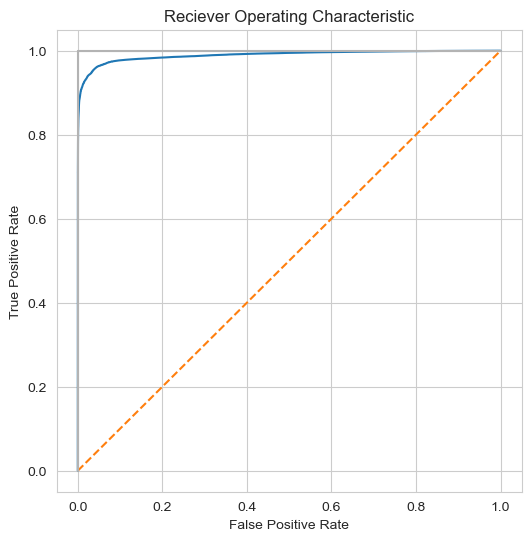

In [33]:
# get predicted probabilities
Y_probabilities = model_rf.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve

plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [34]:
# calculate area under curve
roc_auc_rf = roc_auc_score(y_test, Y_probabilities)
roc_auc_rf

0.9892935119669882

### 2. Decision Tree Model

In [35]:
## Inputting the decision tress classifier

class_tree = DecisionTreeClassifier(splitter='best', random_state=123, min_samples_split=30, min_samples_leaf=10)

# Use the trainning data to train the estimator
model_dtc=%time class_tree.fit(X_train, y_train)

Y_pred_dtc =model_dtc.predict(X_test)

Wall time: 2min 12s


In [36]:
# Calculating and viewing the accuracy score for the decision tree model

accuracy = accuracy_score(y_test, Y_pred_dtc)
print('DecisionTreeClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_dtc)*100))

DecisionTreeClassifier Model accuracy score: 99.0569


In [37]:
# Calculating and viewing the precision score for the decision tree model

precision_dtc = precision_score(y_test, Y_pred_dtc, average='binary', pos_label=1)
print('Decision Tree Classifier Model Precision score: {0:0.4f}'.format(precision_dtc*100))

Decision Tree Classifier Model Precision score: 99.3207


In [38]:
# Calculating and viewing the recall score for the decision tree model

recall_dtc = recall_score(y_test, Y_pred_dtc,pos_label=1)
print('Decision Tree Classifier Model Recall score: {0:0.4f}'.format(recall_dtc*100))

Decision Tree Classifier Model Recall score: 98.7895


In [39]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_dtc = f1_score(y_test, Y_pred_dtc,  pos_label=1)
print('Decision Tree Classifier Model f1_score: {0:0.4f}'.format(f1_score_dtc*100))

Decision Tree Classifier Model f1_score: 99.0544


In [40]:
top_k_dtc = top_k_accuracy_score(y_test, Y_pred_dtc)
print('Decision Tree Classifier Model Top k Accuracy_score: {0:0.4f}'.format(top_k_dtc*100))

Decision Tree Classifier Model Top k Accuracy_score: 100.0000


In [41]:
ave_pre_dtc = average_precision_score(y_test, Y_pred_dtc)
print('Decision Tree Classifier Model Average Precision Score: {0:0.4f}'.format(ave_pre_dtc*100))

Decision Tree Classifier Model Average Precision Score: 98.7237


In [42]:
#Classification Metrices for the decision tree model

print(classification_report(y_test, Y_pred_dtc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    364381
           1       0.99      0.99      0.99    364382

    accuracy                           0.99    728763
   macro avg       0.99      0.99      0.99    728763
weighted avg       0.99      0.99      0.99    728763



In [43]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm_dtc = confusion_matrix(y_test, Y_pred_dtc)
print('Confusion matrix\n\n', cm_dtc)
print('\nTrue Positives(TP) = ', cm_dtc[1,1])
print('\nTrue Negatives(TN) = ', cm_dtc[0,0])
print('\nFalse Positives(FP) = ', cm_dtc[0,1])
print('\nFalse Negatives(FN) = ', cm_dtc[1,0])

Confusion matrix

 [[361919   2462]
 [  4411 359971]]

True Positives(TP) =  359971

True Negatives(TN) =  361919

False Positives(FP) =  2462

False Negatives(FN) =  4411


<AxesSubplot:>

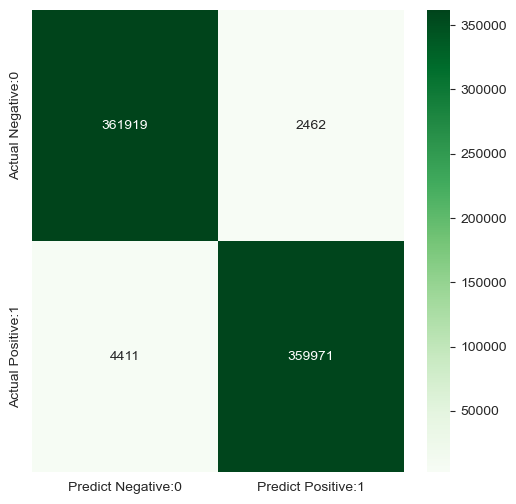

In [44]:
# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_dtc_matrix = pd.DataFrame(data=cm_dtc, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_dtc_matrix, annot=True, fmt='d', cmap=plt.cm.Greens)

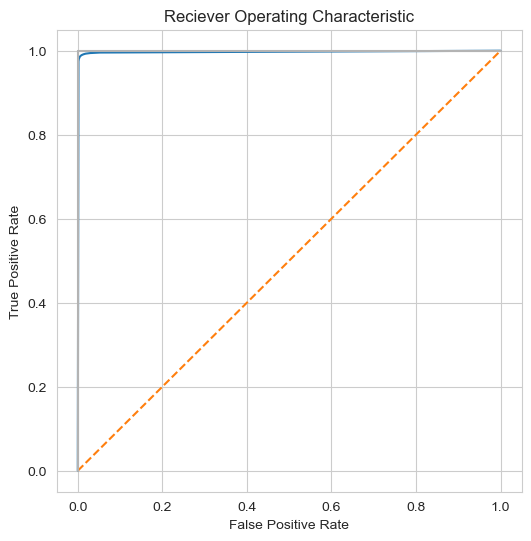

In [45]:
# get predicted probabilities
Y_probabilities = model_dtc.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [46]:
# calculate area under curve
roc_auc_dtc = roc_auc_score(y_test, Y_probabilities)
roc_auc_dtc

0.9968595438446233

### 3. LIGHT GRADIENT BOASTING MACHINE MODEL

In [47]:
## Instantiating the model

model_lgb = lgb.LGBMClassifier(n_estimators=10, max_depth= 10)

## Training the model with the train dataset
%time model_lgb.fit(X_train, y_train)

Wall time: 4.89 s


LGBMClassifier(max_depth=10, n_estimators=10)

In [48]:
# predictng the results of test dataset
Y_pred_lgb=model_lgb.predict(X_test)

In [49]:
# Calculating and viewing the accuracy score for the decision tree model

accuracy = accuracy_score(Y_pred_lgb, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_lgb)*100))

LightGBM Model accuracy score: 96.1173


In [50]:
# Calculating and viewing the precision score for the decision tree model

precision_lgb = precision_score(y_test, Y_pred_lgb, pos_label=1)
print('LightGBM Model Precision score: {0:0.4f}'.format(precision_lgb*100))

LightGBM Model Precision score: 98.1637


In [51]:
# Calculating and viewing the recall score for the decision tree model

recall_lgb = recall_score(y_test, Y_pred_lgb, pos_label=1)
print('LightGBM Model Recall score: {0:0.4f}'.format(recall_lgb*100))

LightGBM Model Recall score: 93.9928


In [52]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_lgb = f1_score(y_test, Y_pred_lgb, pos_label=1)
print('LightGBM Model f1 score: {0:0.4f}'.format(f1_score_lgb*100))

LightGBM Model f1 score: 96.0330


In [53]:
top_k_lgb = top_k_accuracy_score(y_test, Y_pred_lgb)
print('LightGBM Model Top k Accuracy_score: {0:0.4f}'.format(top_k_lgb*100))

LightGBM Model Top k Accuracy_score: 100.0000


In [54]:
ave_pre_lgb = average_precision_score(y_test, Y_pred_lgb)
print('LightGBM Mode Average Precision Score: {0:0.4f}'.format(ave_pre_lgb*100))

LightGBM Mode Average Precision Score: 95.2704


In [55]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm_lgb = confusion_matrix(y_test, Y_pred_lgb)
print('Confusion matrix\n\n', cm_lgb)
print('\nTrue Positives(TP) = ', cm_lgb[1,1])
print('\nTrue Negatives(TN) = ', cm_lgb[0,0])
print('\nFalse Positives(FP) = ', cm_lgb[0,1])
print('\nFalse Negatives(FN) = ', cm_lgb[1,0])

Confusion matrix

 [[357974   6407]
 [ 21889 342493]]

True Positives(TP) =  342493

True Negatives(TN) =  357974

False Positives(FP) =  6407

False Negatives(FN) =  21889


<AxesSubplot:>

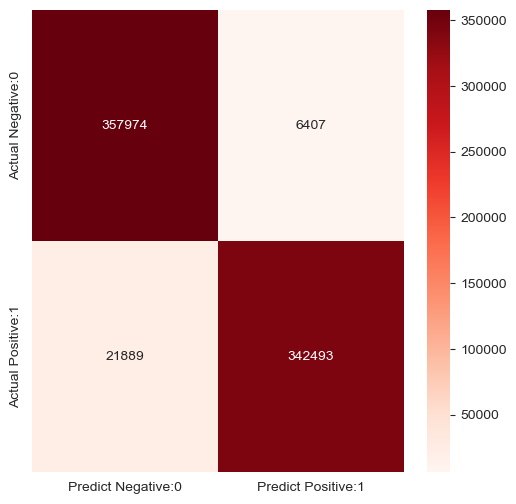

In [56]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_lgb_matrix = pd.DataFrame(data=cm_lgb, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_lgb_matrix, annot=True, fmt='d', cmap=plt.cm.Reds)

In [57]:
#Classification Metrices

## Viewing the classification report of the model
print(classification_report(y_test, Y_pred_lgb))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    364381
           1       0.98      0.94      0.96    364382

    accuracy                           0.96    728763
   macro avg       0.96      0.96      0.96    728763
weighted avg       0.96      0.96      0.96    728763



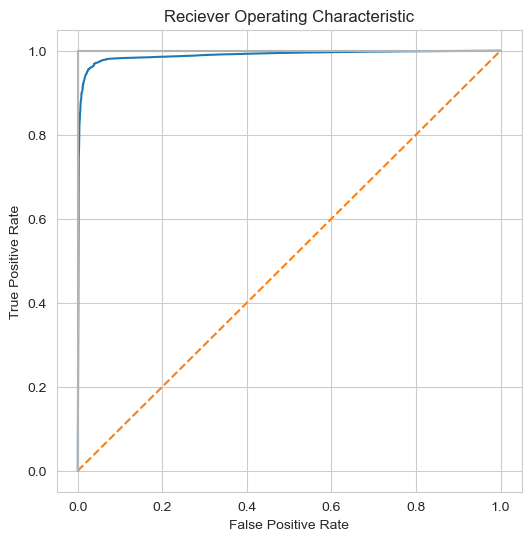

In [58]:
# get predicted probabilities
Y_probabilities = model_lgb.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [59]:
# calculate area under curve
roc_auc_lgb = roc_auc_score(y_test, Y_probabilities)
roc_auc_lgb

0.989378941749638

### 4. Logistic  Regression

In [60]:
## Instantiating the model
logistic_regression = LogisticRegression(max_iter=1000)

## Training the model with the training dataset
model_lgr = %time logistic_regression.fit(X_train, y_train)

# predict the results
Y_pred_lgr=model_lgr.predict(X_test)

Wall time: 6min 46s


In [61]:
# Calculating and viewing the accuracy score for the decision tree model

accuracy=accuracy_score(Y_pred_lgr, y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_lgr)*100))

Logistic Regression Model accuracy score: 91.8922


In [62]:
# Calculating and viewing the precision score for the decision tree model

precision_lgr = precision_score(y_test, Y_pred_lgr, pos_label=1)
print('Logistic Regression Model Precision score: {0:0.4f}'.format(precision_lgr*100))

Logistic Regression Model Precision score: 96.0860


In [63]:
# Calculating and viewing the precision score for the decision tree model

recall_lgr = recall_score(y_test, Y_pred_lgr, pos_label=1)
print('Logistic Regression Model Recall score: {0:0.4f}'.format(recall_lgr*100))

Logistic Regression Model Recall score: 87.3421


In [64]:
# Calculating and viewing the precision score for the decision tree model

f1_score_lgr = f1_score(y_test, Y_pred_lgr, pos_label=1)
print('Logistic Regression Model f1 score: {0:0.4f}'.format(f1_score_lgr*100))

Logistic Regression Model f1 score: 91.5057


In [65]:
top_k_lgr = top_k_accuracy_score(y_test, Y_pred_lgr)
print('Logistic Regression Model Top k Accuracy_score: {0:0.4f}'.format(top_k_lgr*100))

Logistic Regression Model Top k Accuracy_score: 100.0000


In [66]:
ave_pre_lgr = average_precision_score(y_test, Y_pred_lgr)
print('Logistic Regression Model Average Precision Score: {0:0.4f}'.format(ave_pre_lgr*100))

Logistic Regression Model Average Precision Score: 90.2525


In [67]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm_lgr = confusion_matrix(y_test, Y_pred_lgr)
print('Confusion matrix\n\n', cm_lgr)
print('\nTrue Positives(TP) = ', cm_lgr[1,1])
print('\nTrue Negatives(TN) = ', cm_lgr[0,0])
print('\nFalse Positives(FP) = ', cm_lgr[0,1])
print('\nFalse Negatives(FN) = ', cm_lgr[1,0])

Confusion matrix

 [[351417  12964]
 [ 46123 318259]]

True Positives(TP) =  318259

True Negatives(TN) =  351417

False Positives(FP) =  12964

False Negatives(FN) =  46123


<AxesSubplot:>

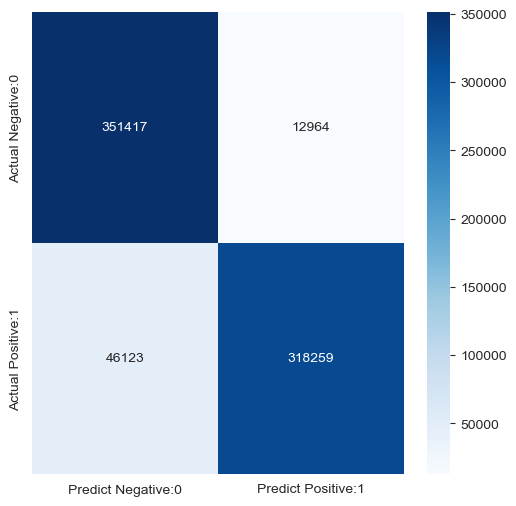

In [68]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_lgr_matrix = pd.DataFrame(data=cm_lgr, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_lgr_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)

In [69]:
#Classification Metrices

## Viewing the classification report of the model

print(classification_report(y_test, Y_pred_lgr))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92    364381
           1       0.96      0.87      0.92    364382

    accuracy                           0.92    728763
   macro avg       0.92      0.92      0.92    728763
weighted avg       0.92      0.92      0.92    728763



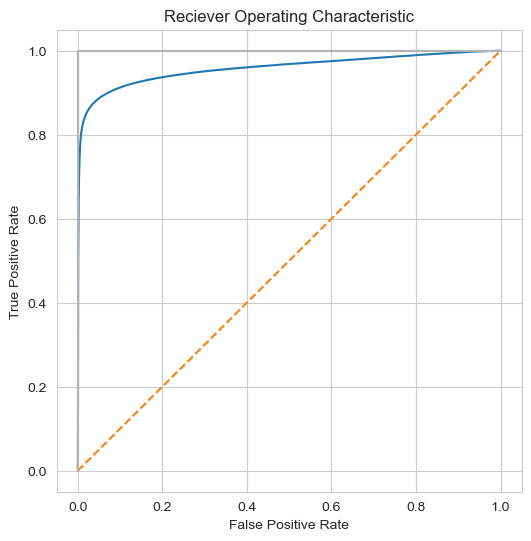

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
Y_probabilities = model_lgr.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [71]:
# calculate area under curve
roc_auc_lgr = roc_auc_score(y_test, Y_probabilities)
roc_auc_lgr

0.9582410401040963

### 5. XG Boast Classifier

In [72]:
## Instantiaitng the library
model_xgb= xgb.XGBClassifier(n_estimators=10, max_depth = 10)

## Training the model using the train data
%time model_xgb.fit(X_train, y_train)

Wall time: 1min 28s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
# predict the results using the test dataset
Y_pred_xgb = model_xgb.predict(X_test)

In [74]:
# Calculating and viewing the accuracy score for the decision tree model

accuracy=accuracy_score(Y_pred_xgb, y_test)
print('xgboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_xgb)*100))

xgboost Model accuracy score: 98.8917


In [75]:
# Calculating and viewing the precision score for the decision tree model

precision_xgb = precision_score(y_test, Y_pred_xgb, pos_label=1)
print('xgboost Model Precision score: {0:0.4f}'.format(precision_xgb*100))

xgboost Model Precision score: 99.6350


In [76]:
# Calculating and viewing the recall score for the decision tree model

recall_xgb = recall_score(y_test, Y_pred_xgb, pos_label= 1)
print('xgboost Model Recall score: {0:0.4f}'.format(recall_xgb*100))

xgboost Model Recall score: 98.1429


In [77]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_xgb  = f1_score(y_test, Y_pred_xgb, pos_label=1)
print('xgboost Model f1 score: {0:0.4f}'.format(f1_score_xgb*100))

xgboost Model f1 score: 98.8833


In [78]:
top_k_xgb = top_k_accuracy_score(y_test, Y_pred_xgb)
print('xgboost Model Top k Accuracy_score: {0:0.4f}'.format(top_k_xgb*100))

xgboost Model Top k Accuracy_score: 100.0000


In [79]:
ave_pre_xgb = average_precision_score(y_test, Y_pred_xgb)
print('xgboost Model Model Average Precision Score: {0:0.4f}'.format(ave_pre_xgb*100))

xgboost Model Model Average Precision Score: 98.7132


In [80]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces


cm_xgb = confusion_matrix(y_test, Y_pred_xgb)
print('Confusion matrix\n\n', cm_xgb)
print('\nTrue Positives(TP) = ', cm_xgb[1,1])
print('\nTrue Negatives(TN) = ', cm_xgb[0,0])
print('\nFalse Positives(FP) = ', cm_xgb[0,1])
print('\nFalse Negatives(FN) = ', cm_xgb[1,0])

Confusion matrix

 [[363071   1310]
 [  6767 357615]]

True Positives(TP) =  357615

True Negatives(TN) =  363071

False Positives(FP) =  1310

False Negatives(FN) =  6767


<AxesSubplot:>

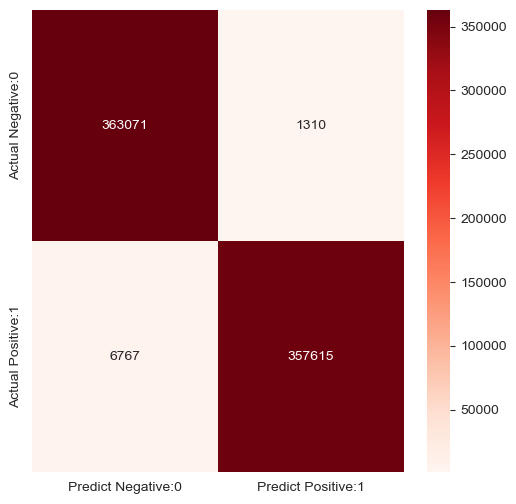

In [81]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_xgb_matrix = pd.DataFrame(data=cm_xgb, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_xgb_matrix, annot=True, fmt='d', cmap=plt.cm.Reds)

In [82]:
## Viewing the classification report of the model

print(classification_report(y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    364381
           1       1.00      0.98      0.99    364382

    accuracy                           0.99    728763
   macro avg       0.99      0.99      0.99    728763
weighted avg       0.99      0.99      0.99    728763



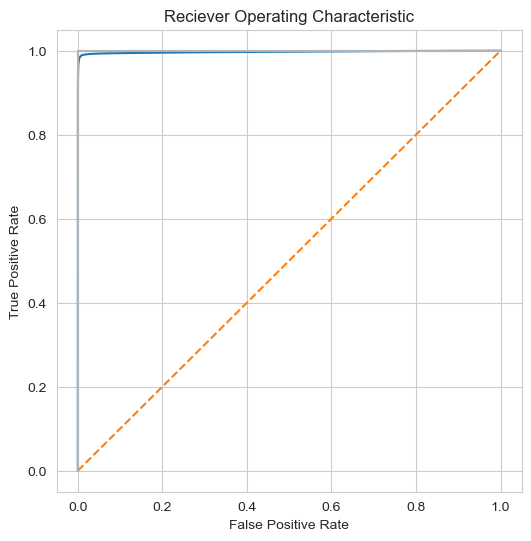

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
Y_probabilities = model_xgb.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve

plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [84]:
# calculate area under curve
roc_auc_xgb = roc_auc_score(y_test, Y_probabilities)
roc_auc_xgb

0.997171206991517

### Summary of Evaluation Metrics

### Step 1. Create Pandas Series for all the Matrices Used

#### Pandas Series for Accuracy Score

In [85]:
Accuracy_Score = {'Decision Tree': accuracy_score(y_test, Y_pred_dtc)*100, 'Logistic Regression': accuracy_score(y_test, Y_pred_lgr)*100, 'Light Gradient Boasitng Machine': accuracy_score(y_test, Y_pred_lgb)*100,
             'XG Boast Machine': accuracy_score(y_test, Y_pred_xgb)*100, 'Random Forest': accuracy_score(y_test, Y_pred_rf)*100}
Accuracy_Score = pd.Series(Accuracy_Score)
Accuracy_Score

Decision Tree                      99.056895
Logistic Regression                91.892151
Light Gradient Boasitng Machine    96.117256
XG Boast Machine                   98.891684
Random Forest                      95.447217
dtype: float64

#### Pandas Series for Precision Score

In [86]:
Precision_Score = {'Decision Tree': precision_dtc*100, 'Logistic Regression': precision_lgr*100, 'Light Gradient Boasitng Machine': precision_lgb*100,
             'XG Boast Machine': precision_xgb*100, 'Random Forest': precision_rf*100}
Precision_Score = pd.Series(Precision_Score)
Precision_Score

Decision Tree                      99.320702
Logistic Regression                96.086021
Light Gradient Boasitng Machine    98.163657
XG Boast Machine                   99.635021
Random Forest                      98.545979
dtype: float64

#### Pandas Series for Recall Score

In [87]:
Recall_Score = {'Decision Tree': recall_dtc*100, 'Logistic Regression': recall_lgr*100, 'Light Gradient Boasitng Machine': recall_lgb*100,
             'XG Boast Machine': recall_xgb*100, 'Random Forest': recall_rf*100}
Recall_Score = pd.Series(Recall_Score)
Recall_Score

Decision Tree                      98.789457
Logistic Regression                87.342130
Light Gradient Boasitng Machine    93.992843
XG Boast Machine                   98.142883
Random Forest                      92.255655
dtype: float64

#### Pandas Series for f1 Score

In [88]:
f1_Score = {'Decision Tree': f1_score_dtc*100, 'Logistic Regression': f1_score_lgr*100, 'Light Gradient Boasitng Machine': f1_score_lgb*100,
             'XG Boast Machine': f1_score_xgb*100, 'Random Forest': f1_score_rf*100}
f1_Score = pd.Series(f1_Score)
f1_Score

Decision Tree                      99.054367
Logistic Regression                91.505668
Light Gradient Boasitng Machine    96.032986
XG Boast Machine                   98.883323
Random Forest                      95.297128
dtype: float64

#### Pandas Series for ROC_AUC Score

In [89]:
ROC_AUC_Score = {'Decision Tree': roc_auc_dtc*100, 'Logistic Regression': roc_auc_lgr*100, 'Light Gradient Boasitng Machine': roc_auc_lgb*100,
             'XG Boast Machine': roc_auc_xgb*100, 'Random Forest': roc_auc_rf*100}
ROC_AUC_Score = pd.Series(ROC_AUC_Score)
ROC_AUC_Score

Decision Tree                      99.685954
Logistic Regression                95.824104
Light Gradient Boasitng Machine    98.937894
XG Boast Machine                   99.717121
Random Forest                      98.929351
dtype: float64

#### Pandas Series for Top_k_Accuracy Score

In [90]:
Top_k_Accuracy_Score = {'Decision Tree': top_k_dtc*100, 'Logistic Regression': top_k_lgr*100, 'Light Gradient Boasitng Machine': top_k_lgb*100,
             'XG Boast Machine': top_k_xgb*100, 'Random Forest': top_k_rf*100}
Top_k_Accuracy_Score = pd.Series(Top_k_Accuracy_Score)
Top_k_Accuracy_Score

Decision Tree                      100.0
Logistic Regression                100.0
Light Gradient Boasitng Machine    100.0
XG Boast Machine                   100.0
Random Forest                      100.0
dtype: float64

#### Pandas Series for Average Precision Score 

In [91]:
Average_Precision_Score = {'Decision Tree': ave_pre_dtc*100, 'Logistic Regression': ave_pre_lgr*100, 'Light Gradient Boasitng Machine': ave_pre_lgb*100,
             'XG Boast Machine': ave_pre_xgb*100, 'Random Forest': ave_pre_rf*100}
Average_Precision_Score = pd.Series(Average_Precision_Score)
Average_Precision_Score

Decision Tree                      98.723655
Logistic Regression                90.252521
Light Gradient Boasitng Machine    95.270395
XG Boast Machine                   98.713242
Random Forest                      94.786416
dtype: float64

#### Pandas Series for the different models built

In [92]:
Models = {'Decision Tree': "Decison_Tree_Model", 'Logistic Regression': "Logistic_Regression_Model", 'Light Gradient Boasitng Machine': "LGBM_Model",
             'XG Boast Machine': "XGBM_Model", 'Random Forest': "Random_Forest_Model"}
Models = pd.Series(Models)
Models

Decision Tree                             Decison_Tree_Model
Logistic Regression                Logistic_Regression_Model
Light Gradient Boasitng Machine                   LGBM_Model
XG Boast Machine                                  XGBM_Model
Random Forest                            Random_Forest_Model
dtype: object

### Step 2. Concating all the series together to get a dataframe

In [93]:
cmm = pd.DataFrame({'Models':Models, 'Accuracy': Accuracy_Score,'Precision': Precision_Score,
                    'Recall': Recall_Score,'f1': f1_Score, 
                    'ROC_AUC': ROC_AUC_Score,
                   "Average Precision":Average_Precision_Score, 'Top k Accuracy':Top_k_Accuracy_Score})

### A DataFrame That Shows The Five (5) Models Built Against The Different Evalaution Matrices Used

In [94]:
cmm_df = cmm.reset_index(drop=True)
cmm_df

,Models,Accuracy,Precision,Recall,f1,ROC_AUC,Average Precision,Top k Accuracy
0,Decison_Tree_Model,99.056895,99.320702,98.789457,99.054367,99.685954,98.723655,100.0
1,Logistic_Regression_Model,91.892151,96.086021,87.342130,91.505668,95.824104,90.252521,100.0
2,LGBM_Model,96.117256,98.163657,93.992843,96.032986,98.937894,95.270395,100.0
3,XGBM_Model,98.891684,99.635021,98.142883,98.883323,99.717121,98.713242,100.0
4,Random_Forest_Model,95.447217,98.545979,92.255655,95.297128,98.929351,94.786416,100.0


In [95]:
cmm_df.to_csv('Result of Hybrid Strategy.csv')